# 2D Grid World - Loop Walker - Multi Room

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../packages")
import os
import numpy as np
import matplotlib.pyplot as plt
import gym
import collections

import floorplan
from learners.q_learning import QLearningLearner
from floorplan.envs.loopwalkergridworld import LoopWalkerGridWorldV1, LoopWalkerGridWorldV2
from learners.on_policiy_firstvisit_mc import OnPolicyFirstVisitMCCLearner

## Adaptions to the environment

See report

# Two-Room example

trained for 10000 episodes each, linearly decr. epsilon to 0 every 200 episodes
Wall time: 1min 59s


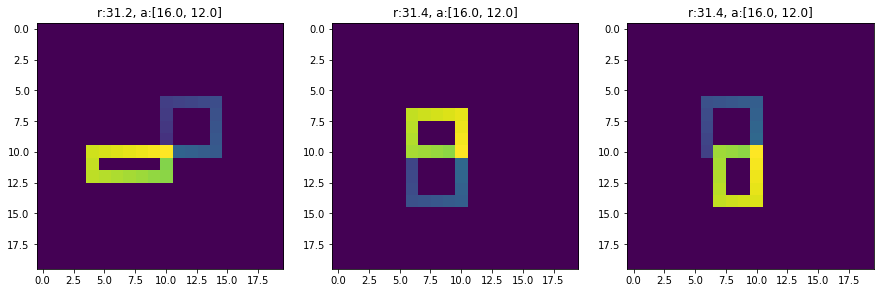

In [7]:
%%time
gridSize=20
targetArea=[16,12]
alpha = 0.9
gamma = 1
nExperiments = 3
decEpsilonBy = 0.02
decEpsilonEvery = 200
wallCost = 0.1
cornerCost = 0.4 * 4 ############ NEW
failCost = 3
run = None #'_exp_test_27'
np.random.seed(23)
############################
print('trained for %i episodes each, linearly decr. epsilon to 0 every %i episodes' % (decEpsilonEvery/decEpsilonBy, decEpsilonEvery))
fig, ax = plt.subplots(1,max([2,nExperiments]), figsize=(15,5))
for _ in range(nExperiments):
    env = LoopWalkerGridWorldV2()
    env.setup(h=gridSize,w=gridSize,a=targetArea,wallCost=wallCost, cornerCost=cornerCost, failCost=failCost)
    learner = QLearningLearner(env)
    _run = run + '_' + str(_) if not run is None else None
    learner.train(epsilon=1000, alpha=1000, gamma=1000, nEpisodes=0, reset=True, run=_run)
    epsilon = 1
    while epsilon >= 0:
        learner.train(epsilon=epsilon, alpha=alpha, gamma=gamma, nEpisodes=decEpsilonEvery, statsEveryNEpisodes=10, nGreedySim=10, abortIf=-30, reset=False, run=_run)
        epsilon -= decEpsilonBy
    greedyReward = learner.runEpisode(0.0, abortIf=-30)
    ax[_].imshow(learner.env.render())
    ax[_].set_title('r:%.1f, a:%s' % (greedyReward, learner.env._areas))
    sys.stdout.write('\rProgress: %i' % (_))
sys.stdout.write("\r\033[K")

# Three-Room example

trained for 20000 episodes each, linearly decr. epsilon to 0 every 200 episodes
Wall time: 4min 46s


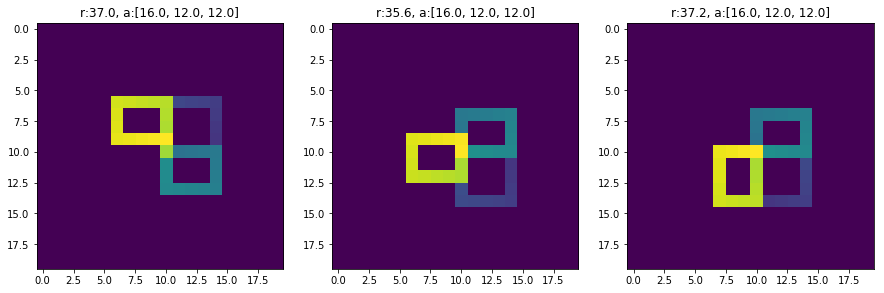

In [8]:
%%time
gridSize=20
targetArea=[16,12,12]
alpha = 0.9
gamma = 1
nExperiments = 3
decEpsilonBy = 0.01
decEpsilonEvery = 200
wallCost = 0.1
cornerCost = 0.4 * 4 ############ NEW
failCost = 3
run = None #'_exp_test_27'
np.random.seed(23)
############################
print('trained for %i episodes each, linearly decr. epsilon to 0 every %i episodes' % (decEpsilonEvery/decEpsilonBy, decEpsilonEvery))
fig, ax = plt.subplots(1,nExperiments, figsize=(15,5))
for _ in range(nExperiments):
    env = LoopWalkerGridWorldV2()
    env.setup(h=gridSize,w=gridSize,a=targetArea,wallCost=wallCost, cornerCost=cornerCost, failCost=failCost)
    learner = QLearningLearner(env)
    _run = run + '_' + str(_) if not run is None else None
    learner.train(epsilon=1000, alpha=1000, gamma=1000, nEpisodes=0, reset=True, run=_run)
    epsilon = 1
    while epsilon >= 0:
        learner.train(epsilon=epsilon, alpha=alpha, gamma=gamma, nEpisodes=decEpsilonEvery, abortIf=-30, reset=False, run=_run)
        epsilon -= decEpsilonBy
    greedyReward = learner.runEpisode(0.0, abortIf=-30)
    ax[_].imshow(learner.env.render())
    ax[_].set_title('r:%.1f, a:%s' % (greedyReward, learner.env._areas))
    sys.stdout.write('\rProgress: %i' % (_))
sys.stdout.write("\r\033[K")

# Four-Room example

trained for 20000 episodes each, linearly decr. epsilon to 0 every 200 episodes
Wall time: 6min 11s


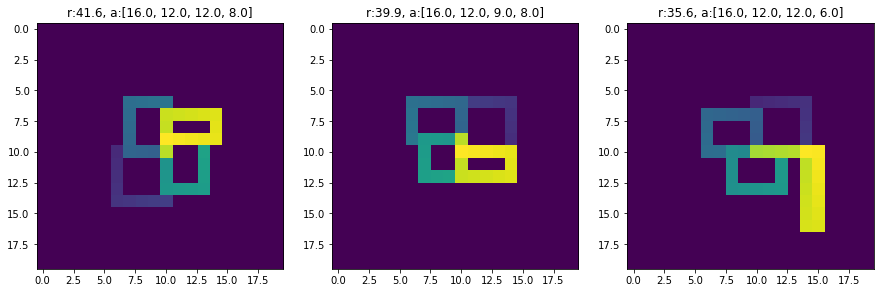

In [9]:
%%time
gridSize=20
targetArea=[16,13,12,9]
alpha = 0.9
gamma = 1
nExperiments = 3
decEpsilonBy = 0.01
decEpsilonEvery = 200
wallCost = 0.1
cornerCost = 0.4 * 3 ############ NEW
failCost = 3
run = None #'_exp_test_27'
np.random.seed(23)
############################
print('trained for %i episodes each, linearly decr. epsilon to 0 every %i episodes' % (decEpsilonEvery/decEpsilonBy, decEpsilonEvery))
fig, ax = plt.subplots(1,nExperiments, figsize=(15,5))
for _ in range(nExperiments):
    env = LoopWalkerGridWorldV2()
    env.setup(h=gridSize,w=gridSize,a=targetArea,wallCost=wallCost, cornerCost=cornerCost, failCost=failCost)
    learner = QLearningLearner(env)
    _run = run + '_' + str(_) if not run is None else None
    learner.train(epsilon=1000, alpha=1000, gamma=1000, nEpisodes=0, reset=True, run=_run)
    epsilon = 1
    while epsilon >= 0:
        learner.train(epsilon=epsilon, alpha=alpha, gamma=gamma, nEpisodes=decEpsilonEvery, abortIf=-30, reset=False, run=_run)
        epsilon -= decEpsilonBy
    greedyReward = learner.runEpisode(0.0, abortIf=-30)
    ax[_].imshow(learner.env.render())
    ax[_].set_title('r:%.1f, a:%s' % (greedyReward, learner.env._areas))
    sys.stdout.write('\rProgress: %i' % (_))
sys.stdout.write("\r\033[K")